In [1]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# step:
1. Loading data and checking for any null or missing values
2. detecting and Removing Duplicates Entries 
3. Counting and Exploring Fraud and genuine transactions
4. Visualizing the data distribution by plotting Histogram, Scatter Plot and HeatMap 

In [2]:
# loading dataset
data=pd.read_csv('C:/Users/Hp/OneDrive/Desktop/python/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Getting an idea about null values
data.isnull().sum().any()

np.False_

# False means that there are no null values in the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# getting an idea of duplicate entries
print(data.duplicated().sum())
# Removing the duplicate rows
data.drop_duplicates(inplace = True)
# Getting an idea about duplicate data
print(data.duplicated().sum())

1081
0


In [6]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344


In [7]:
fraud_cases=len(data[data['Class']==1])
print(' Number of Fraud Cases:',fraud_cases)
non_fraud_cases=len(data[data['Class']==0])
print('Number of Non Fraud Cases:',non_fraud_cases)

 Number of Fraud Cases: 473
Number of Non Fraud Cases: 283253


# Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don’t get a good accuracy then we can find a way to balance this dataset. But first, let’s implement the model without it and will balance the data only if needed.
# Class column having 0 indicates a normal transaction
# Class column having 1 indicates a fraud transaction

In [8]:
fraud=data[data['Class']==1]
print(fraud.Amount.describe())
genuine=data[data['Class']==0]
print(genuine.Amount.describe())

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


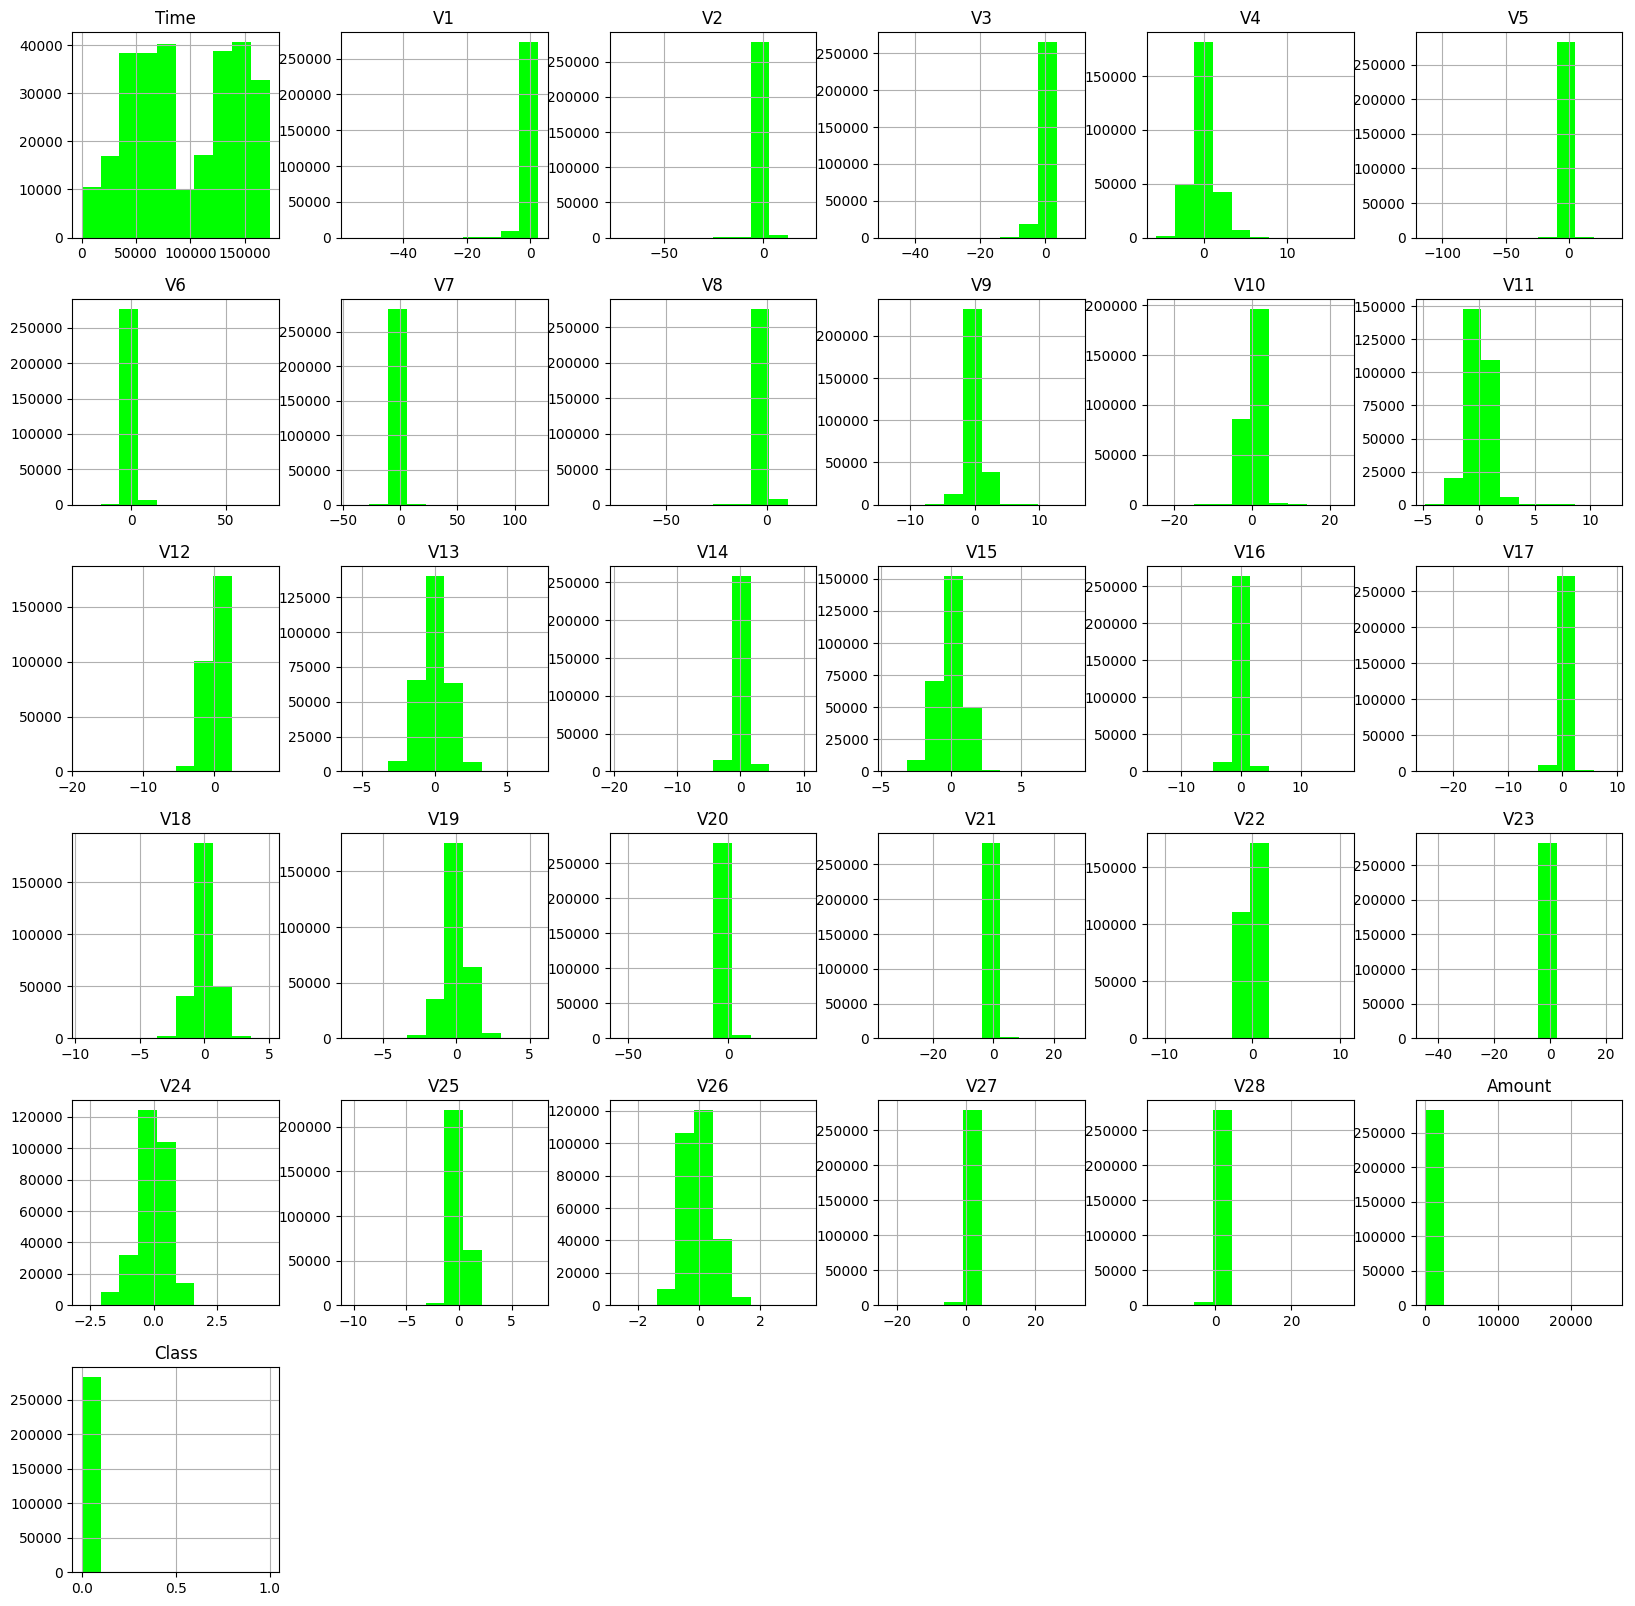

In [9]:
# Histogram is plotted for understanding the distribution of each features; detecting Skewness and Outliers
data.hist(figsize=(20,20),color='lime')
plt.show()

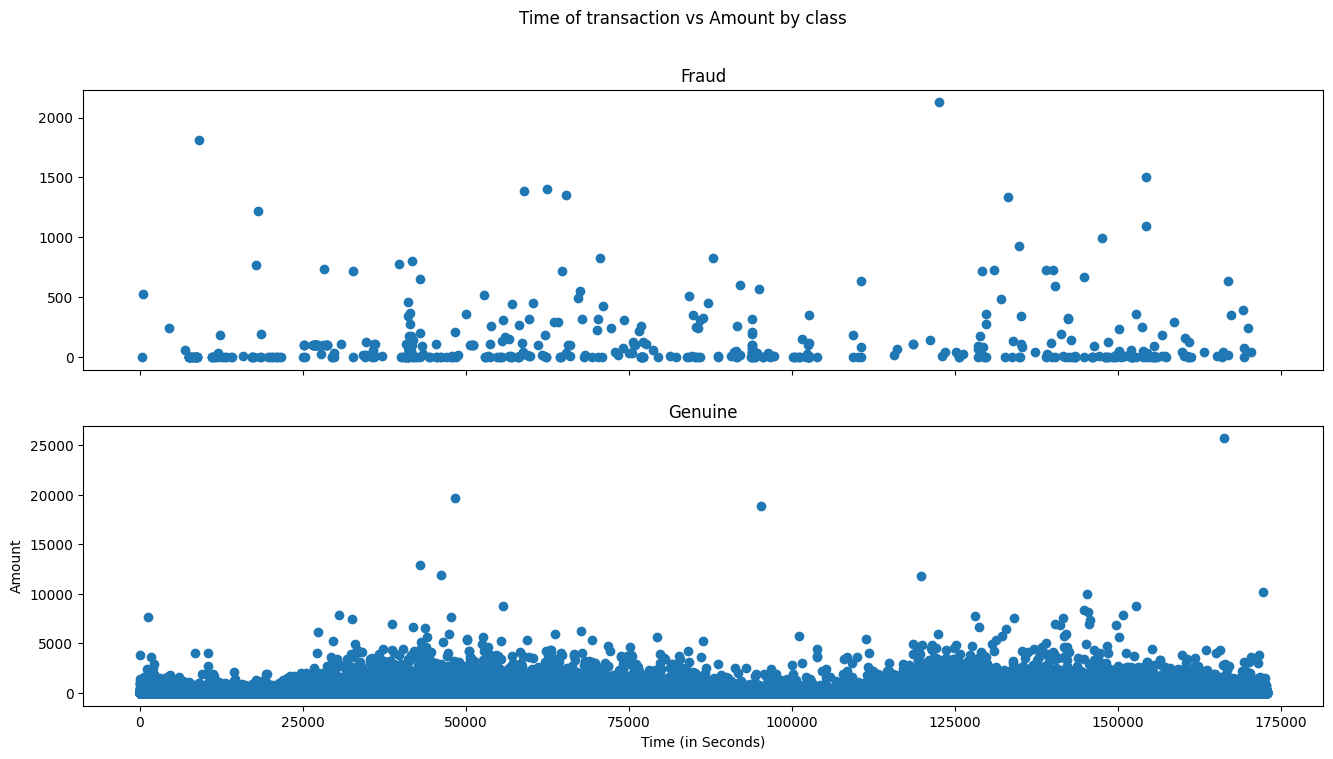

In [10]:
# Scatter plot was plotted for detecting Clusters and Outliers and for visual comparision of two classes
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

<Axes: >

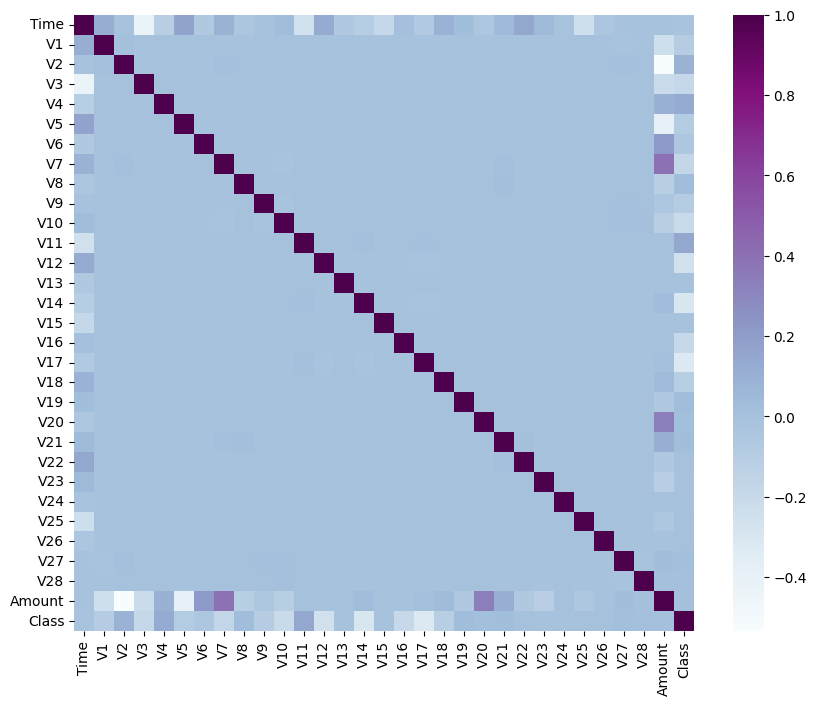

In [11]:
# Heatmap was plotted to identify important features, detecting multicollineartity 
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='BuPu')

# In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

In [12]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(283726, 30)
(283726,)


# Building the Random Forest Classifier (RANDOM FOREST)
1. Preparing the data for machine learning
2. Splitting the data into Training and Test Sets
3. Building Random Forest Classifier
4. Making predictions and Evaluation was done using various metrics 
5. Confusion Matrix was plotted for a clear assessment of how well the classifier is performing; for analyzing the types of errors 
the model is making and fine tuning of model

In [13]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
x_Train, x_Test, y_Train, y_Test = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
#rfc = RandomForestClassifier()
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', n_jobs=-1, random_state=42)
model_1 = rfc.fit(x_Train, y_Train)
# predictions
y_Pred = model_1.predict(x_Test)
accuracy_score_1= np.round(accuracy_score(y_Test,y_Pred),2)
print("Accuracy:", accuracy_score_1)

Accuracy: 1.0


In [14]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (y_Pred != y_Test).sum()
print("The model used is Random Forest classifier")

acc = np.round(accuracy_score(y_Test, y_Pred),2)
print("The accuracy is {}".format(acc))

prec = np.round(precision_score(y_Test, y_Pred),2)
print("The precision is {}".format(prec))

rec = np.round(recall_score(y_Test, y_Pred),2)
print("The recall is {}".format(rec))

f1 = np.round(f1_score(y_Test, y_Pred),2)
print("The F1-Score is {}".format(f1))

The model used is Random Forest classifier
The accuracy is 1.0
The precision is 0.97
The recall is 0.71
The F1-Score is 0.82


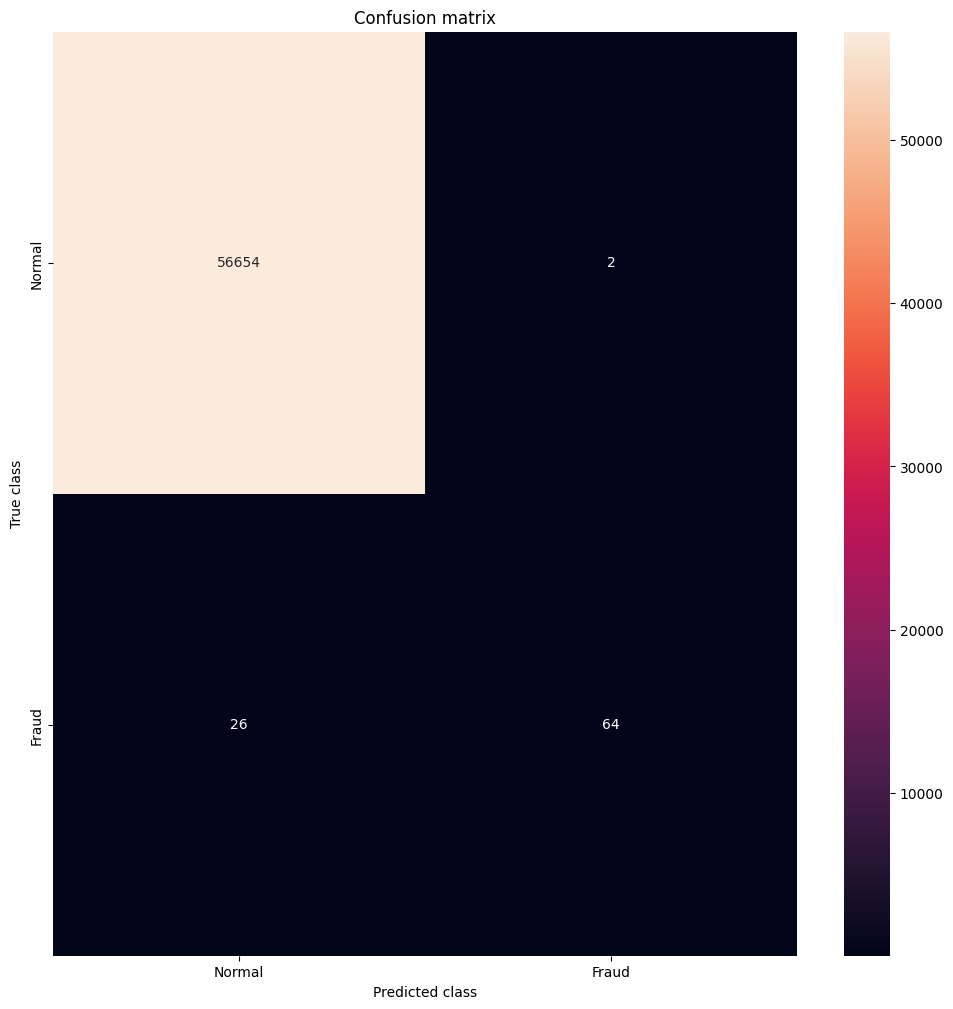

In [15]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_Test, y_Pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Building the Logistic Regression
1. Data is prepared and K Fold Validation was applied
2. Regularization of parameter 'C' has been done
3. Grid search for hyperparameter tuning was applied
4. Logistic Regression model was fitted on training data 

In [16]:
X1=data.drop(['Class'],axis=1)
y1=data['Class']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X1_train, y1_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [17]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.152436,0.894214,0.037721,0.012003,0.01,{'C': 0.01},0.901817,0.889539,0.934704,0.910286,...,0.914617,0.018463,1,0.907777,0.926720,0.912246,0.916508,0.915775,0.915805,0.006273
1,6.432231,0.332636,0.040979,0.005325,0.10,{'C': 0.1},0.880919,0.892896,0.929308,0.914376,...,0.908119,0.018353,3,0.899809,0.924444,0.918861,0.912894,0.890274,0.909256,0.012536
2,6.760628,0.695493,0.037981,0.005828,1.00,{'C': 1},0.893286,0.896527,0.930015,0.872360,...,0.903072,0.021032,5,0.916213,0.928755,0.914365,0.894573,0.889881,0.908757,0.014453
3,6.604725,0.182906,0.042575,0.011716,10.00,{'C': 10},0.902940,0.896644,0.926526,0.893266,...,0.908513,0.013742,2,0.924623,0.928826,0.919110,0.907336,0.889851,0.913949,0.014045
4,6.763629,0.436403,0.040376,0.003260,100.00,{'C': 100},0.906392,0.896833,0.932866,0.870839,...,0.905828,0.021471,4,0.926796,0.929021,0.923893,0.892321,0.893139,0.913034,0.016660
5,6.754233,0.193776,0.039378,0.005813,1000.00,{'C': 1000},0.902699,0.897040,0.860195,0.876553,...,0.892051,0.021905,6,0.924627,0.929489,0.854389,0.898257,0.892754,0.899903,0.026877


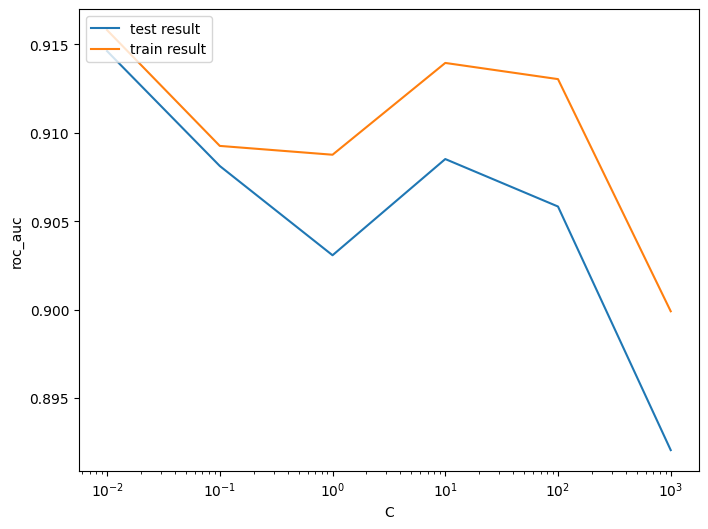

In [18]:
# plot of C versus train and validation scores
# the mean test and training scores are plotted to visualize the model performance 

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [19]:
# Best ROC_AUC score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9146171659942246 at C = 0.01


# Logistic regression with optimal C

In [20]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X1_train, y1_train)

# Prediction on the train set
1. Final model training was done and predictions were calculated on training set

In [21]:
# Predictions on the train set
y1_train_pred = logistic_imb_model.predict(X1_train)
# Confusion matrix
confusion = metrics.confusion_matrix(y1_train, y1_train_pred)
print(confusion)

[[198211     73]
 [   131    193]]


In [22]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [23]:
print("Prediction on the train set")
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y1_train, y1_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y1_train, y1_train_pred))

Prediction on the train set
Accuracy:- 0.9989728510432611
Sensitivity:- 0.595679012345679
Specificity:- 0.9996318411974743
F1-Score:- 0.6542372881355932


In [24]:
# classification_report
print(classification_report(y1_train, y1_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198284
           1       0.73      0.60      0.65       324

    accuracy                           1.00    198608
   macro avg       0.86      0.80      0.83    198608
weighted avg       1.00      1.00      1.00    198608



# ROC on the train set

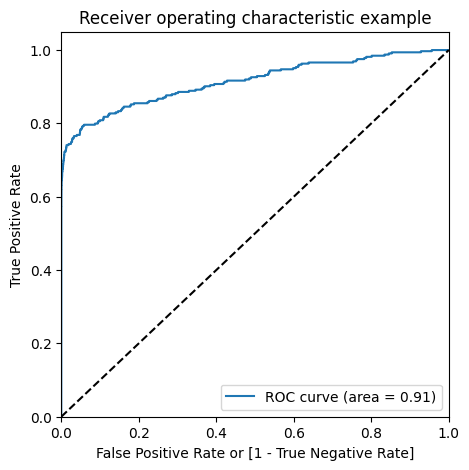

In [25]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
# Predicted probability
y1_train_pred_proba = logistic_imb_model.predict_proba(X1_train)[:,1]
# Plot the ROC curve
draw_roc(y1_train, y1_train_pred_proba)

# We acheived very good ROC 0.91 on the train set.

# Prediction on the test set
same steps were repeated with test set and prediction were calculated on test set

In [26]:
# Prediction on the test set
y1_test_pred = logistic_imb_model.predict(X1_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y1_test, y1_test_pred)
print(confusion)

[[84939    30]
 [   53    96]]


In [27]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [28]:
print("Prediction on the test set")

# Accuracy
print("Accuracy:-",metrics.accuracy_score(y1_test, y1_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y1_test, y1_test_pred))

Prediction on the test set
Accuracy:- 0.9990248831034564
Sensitivity:- 0.6442953020134228
Specificity:- 0.9996469300568442
F1-Score:- 0.6981818181818182


In [29]:
# classification_report
print(classification_report(y1_test, y1_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84969
           1       0.76      0.64      0.70       149

    accuracy                           1.00     85118
   macro avg       0.88      0.82      0.85     85118
weighted avg       1.00      1.00      1.00     85118



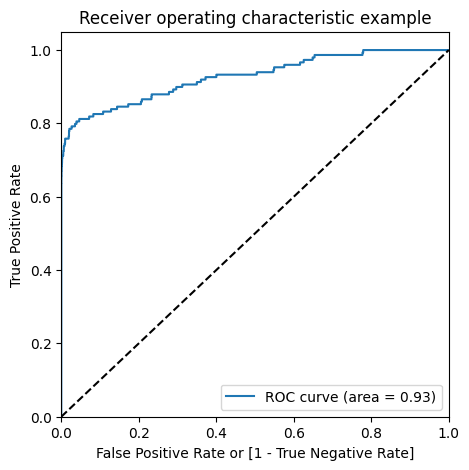

In [30]:
# Predicted probability
y1_test_pred_proba = logistic_imb_model.predict_proba(X1_test)[:,1]
# Plot the ROC curve
draw_roc(y1_test, y1_test_pred_proba)

# Model summary

# Train set
Accuracy:- 0.9989728510432611
Sensitivity:- 0.595679012345679
Specificity:- 0.9996318411974743
F1-Score:- 0.6542372881355932
ROC = 0.91

# Test set
Accuracy:- 0.9990248831034564
Sensitivity:- 0.6442953020134228
Specificity:- 0.9996469300568442
F1-Score:- 0.6981818181818182
ROC = 0.93
Overall, the model is performing well in the test set, what it had learnt from the train set.

In [31]:
X1=data.drop(['Class'],axis=1)
y1=data['Class']
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.3,random_state=123)
lr=LogisticRegression()
model_2=lr.fit(X1_train,y1_train)
y_Pred_2=model_2.predict(X1_test)
accuracy_score_2 = np.round(accuracy_score(y1_test,y_Pred_2),2)
print("Accuracy:", accuracy_score_2)

Accuracy: 1.0


In [32]:
# Using SMOTE to handle imbalance in the data
print('Before SMOTE, count of label 1 :', sum(y1_train == 1))
print('Before SMOTE, count of label 0 :', sum(y1_train == 0))

# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 5)
X1_train_res, y1_train_res = sm.fit_resample(X1_train, y1_train)

print('\nAfter SMOTE, count of label 1 :', sum(y1_train_res == 1))
print('After SMOTE, count of label 0 :', sum(y1_train_res == 0))

Before SMOTE, count of label 1 : 324
Before SMOTE, count of label 0 : 198284

After SMOTE, count of label 1 : 198284
After SMOTE, count of label 0 : 198284


In [33]:
# Evaluating the LogisticRegression (with handling class imbalance by SMOTE)
# printing every score of the LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (y_Pred_2 != y1_test).sum()
print("The model used is LogisticRegression")

acc = np.round(accuracy_score(y1_test, y_Pred_2),2)
print("The accuracy is {}".format(acc))

prec = np.round(precision_score(y1_test, y_Pred_2),2)
print("The precision is {}".format(prec))

rec = np.round(recall_score(y1_test, y_Pred_2),2)
print("The recall is {}".format(rec))

f1 = np.round(f1_score(y1_test, y_Pred_2),2)
print("The F1-Score is {}".format(f1))

The model used is LogisticRegression
The accuracy is 1.0
The precision is 0.84
The recall is 0.66
The F1-Score is 0.74


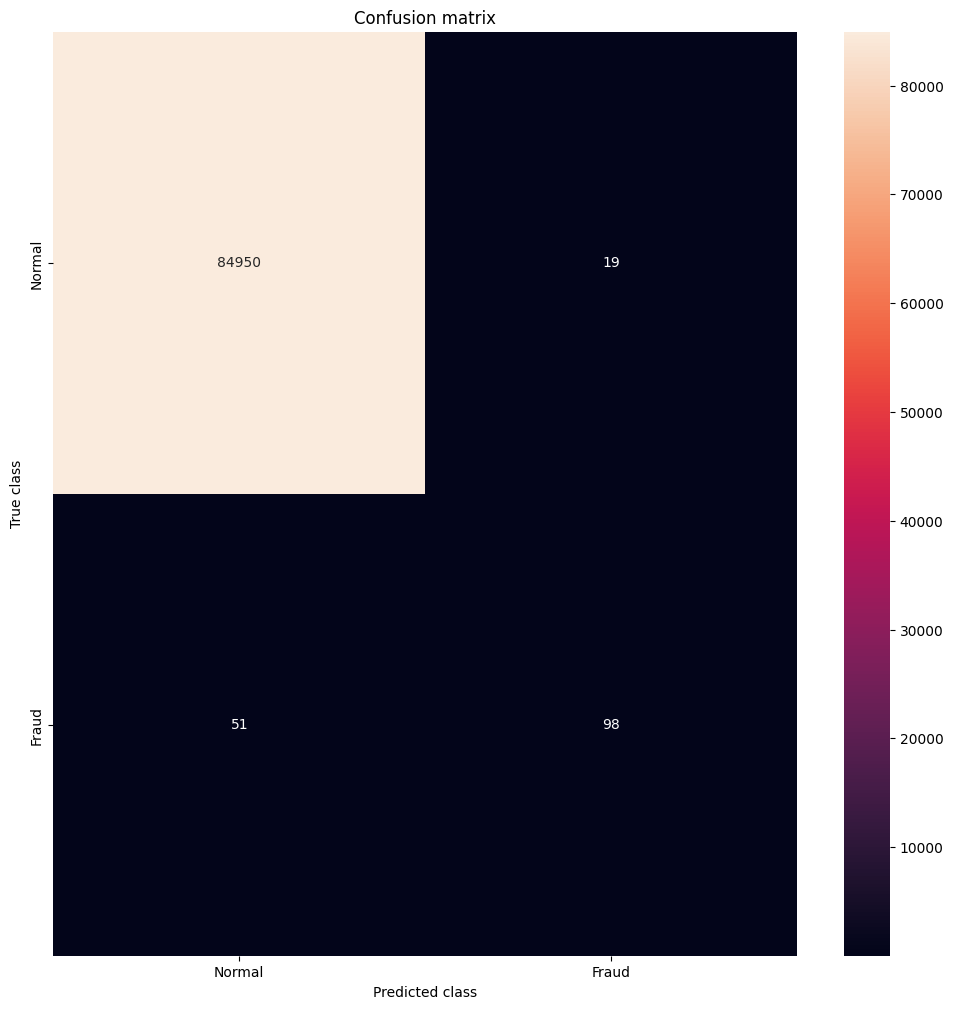

In [34]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix_1= confusion_matrix(y1_test,y_Pred_2)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_1, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Building the Decision Tree Classifier
1. Feature selection was done
2. Data was splitted into training and test set
3. Model was initialised and trained
4. predictions were made and model was evaluated using different metrics
5. Confusion matrix was plotted again by comparing the actual and predicted values to evaluate the performance of the mode 

In [35]:
X2=data.drop(['Class'],axis=1)
y2=data['Class']
dt=DecisionTreeClassifier()
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3,random_state=123)
model_3=dt.fit(X2_train,y2_train)
y_Pred_3=model_3.predict(X2_test)
accuracy_score_3 = np.round(accuracy_score(y2_test,y_Pred_3),2)
print("Accuracy:", accuracy_score_3)

Accuracy: 1.0


In [36]:
# Evaluating the DecisionTreeClassifier
# printing every score of the DecisionTreeClassifier
# scoring in anything
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (y_Pred_3 != y2_test).sum()
print("The model used is DecisionTreeClassifier")

acc = np.round(accuracy_score(y2_test, y_Pred_3),2)
print("The accuracy is {}".format(acc))

prec = np.round(precision_score(y2_test, y_Pred_3),2)
print("The precision is {}".format(prec))

rec = np.round(recall_score(y2_test, y_Pred_3),2)
print("The recall is {}".format(rec))

f1 = np.round(f1_score(y2_test, y_Pred_3),2)
print("The F1-Score is {}".format(f1))

The model used is DecisionTreeClassifier
The accuracy is 1.0
The precision is 0.77
The recall is 0.74
The F1-Score is 0.76


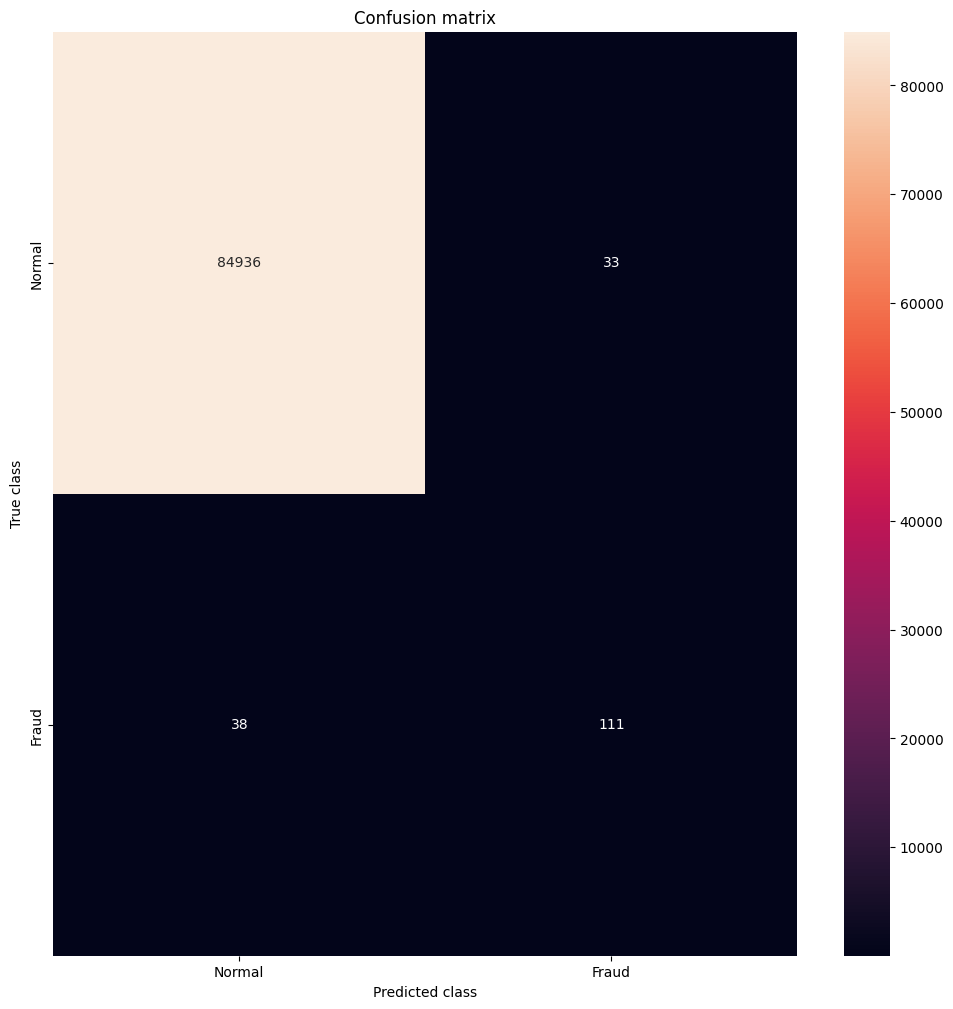

In [37]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix_2= confusion_matrix(y2_test,y_Pred_3)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix_2, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# comparision of scores of all the three models
1. The model used is Random Forest classifier
The accuracy is 1.0
The precision is 0.97
The recall is 0.71
The F1-Score is 0.82

2. The model used is LogisticRegression
The accuracy is 1.0
The precision is 0.84
The recall is 0.66
The F1-Score is 0.74

3. The model used is DecisionTreeClassifier
The accuracy is 1.0
The precision is 0.77
The recall is 0.74
The F1-Score is 0.76